In [ ]:
#下準備。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install japanize-matplotlib

In [ ]:
#簡単のための定義。
amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_data/Amazon Sale Report.csv', low_memory=False)

In [ ]:
#以下、データ構造の把握。
amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [ ]:
amazon.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [ ]:
amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [ ]:
amazon.describe(include='O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


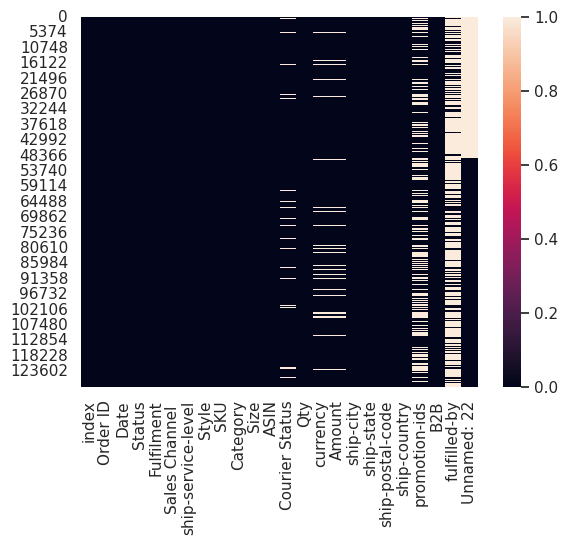

In [ ]:
sns.heatmap(amazon.isnull())
plt.show()

In [ ]:
amazon.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [ ]:
#以下、データの整形。
amazon.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

In [ ]:
amazon[amazon.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [ ]:
len(amazon)-len(amazon.drop_duplicates(['Order ID','ASIN']))

7

In [ ]:
amazon['Courier Status'].fillna('unknown',inplace=True)

In [ ]:
amazon['promotion-ids'].fillna('no promotion',inplace=True)

In [ ]:
amazon[amazon['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

,proportion
Status,
Cancelled,97.06%
Shipped,2.67%
Shipped - Delivered to Buyer,0.10%
Shipping,0.10%
Shipped - Returned to Seller,0.04%
Pending,0.03%


In [ ]:
amazon['Amount'].fillna(0,inplace=True)

In [ ]:
amazon['ship-city'].fillna('unknown', inplace = True)
amazon['ship-state'].fillna('unknown', inplace = True)
amazon['ship-postal-code'].fillna('unknown', inplace = True)

In [ ]:
mapper = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category',
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity',
          'Amount':'order_amount_(\)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip',
          'promotion-ids':'promotion','B2B':'customer_type'}

In [ ]:
amazon.rename(columns=mapper, inplace =True)

In [ ]:
# INR(インド・ルピー)をJPY(日本円)に換算※2025/2/28時点。
exchange_rate = 1.71388
amazon['order_amount_(\)'] = amazon['order_amount_(\)'].apply(lambda x: x * exchange_rate)

In [ ]:
amazon['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

In [ ]:
amazon['date'] = pd.to_datetime(amazon['date'])

In [ ]:
# 3月の日付のみにする。
march_dates = amazon['date'][amazon['date'].dt.month == 3]
march_dates.dt.day.nunique()

1

In [ ]:
# 3月のデータの消去。
amazon = amazon[(amazon['date'].dt.month != 3)]

In [ ]:
amazon['month'] = amazon['date'].dt.month
amazon["month"].unique()

array([4, 5, 6], dtype=int32)

In [ ]:
month_map = { 4: 'april',5: 'may',6: 'june'}
amazon['month'] = amazon['date'].dt.month.map(month_map)

In [ ]:
# 月の順序。
month_order = ['april', 'may', 'june']
amazon['month'] = pd.Categorical(amazon['month'], categories=month_order, ordered=True)

In [ ]:
print(f'This dataset contains the months {amazon["month"].unique()} for 2022')
print(f'The earliest date is {amazon["date"].min()}')
print(f'The latest date is {amazon["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


In [ ]:
#　サイズについて。
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']
amazon['size'] = pd.Categorical(amazon['size'], categories=size_order, ordered=True)
#　データ整形ここまで。

In [110]:
# データ概要把握。
revenue_by_month = amazon.groupby('month')['order_amount_(\)'].sum()
percent_decrease_apr_to_may = (revenue_by_month['april'] - revenue_by_month['may']) / revenue_by_month['april'] * 100
percent_decrease_may_to_jun = (revenue_by_month['may'] - revenue_by_month['june']) / revenue_by_month['may'] * 100
total_decrease = (revenue_by_month['april'] - revenue_by_month['june']) / revenue_by_month['april'] * 100
print(f"Total revenue for April 2022: \{revenue_by_month['april']:,.2f}")
print(f"Total revenue for May 2022: \{revenue_by_month['may']:,.2f}, which is a -{percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: \{revenue_by_month['june']:,.2f}, which is a -{percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")
print("\n")

revenue_by_category = amazon.groupby('product_category')['order_amount_(\)'].sum().sort_values(ascending=False)
print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "\{:,.2f}".format(x)))
print("\n")

revenue_by_category = amazon.groupby('product_category')['order_amount_(\)'].sum()
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
percent_revenue_by_category = percent_revenue_by_category.apply(lambda x: "{:.2f}%".format(x))
print("Percentage of revenue by product category:")
print(percent_revenue_by_category)
print("\n")

avg_price_by_category = amazon.groupby('product_category')['order_amount_(\)'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))
print("\n")

cancelled_orders = amazon[amazon['ship_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = amazon[amazon['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled = total_cancelled / len(amazon) * 100
percent_returned = total_returned / len(amazon) * 100
percent_cancelled_returned = total_cancelled_returned / amazon['order_quantity'].sum() * 100
print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")
print("\n")


monthly_order_data = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_(\)': 'mean', 'order_quantity': 'mean'})
monthly_order_data = monthly_order_data.rename(columns={'order_amount_($)': 'average_order_amount', 'order_quantity': 'average_order_quantity'})
print(monthly_order_data)
print("\n")

popular_category_by_state = amazon.groupby(['state', 'product_category'])['order_quantity'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state', 'order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)
print("\n")

avg_order_amount_by_customer_type = amazon.groupby('customer_type')['order_amount_(\)'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "\{:,.2f}".format(x)))

Total revenue for April 2022: \49,426,085.42
Total revenue for May 2022: \44,949,033.97, which is a -9.06% decrease from April.
Total revenue for June 2022: \40,149,026.18, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%


Total revenue by product category:
product_category
Set              \67,098,813.38
kurta            \36,446,155.45
Western Dress    \19,209,885.86
Top               \9,157,742.95
Ethnic Dress      \1,354,168.57
Blouse              \785,176.73
Bottom              \258,226.84
Saree               \212,407.59
Dupatta               \1,568.20
Name: order_amount_(\), dtype: object


Percentage of revenue by product category:
product_category
Set              49.88%
kurta            27.09%
Western Dress    14.28%
Top               6.81%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount_(\), dtype: object


Top 5 product categories by average price:
p

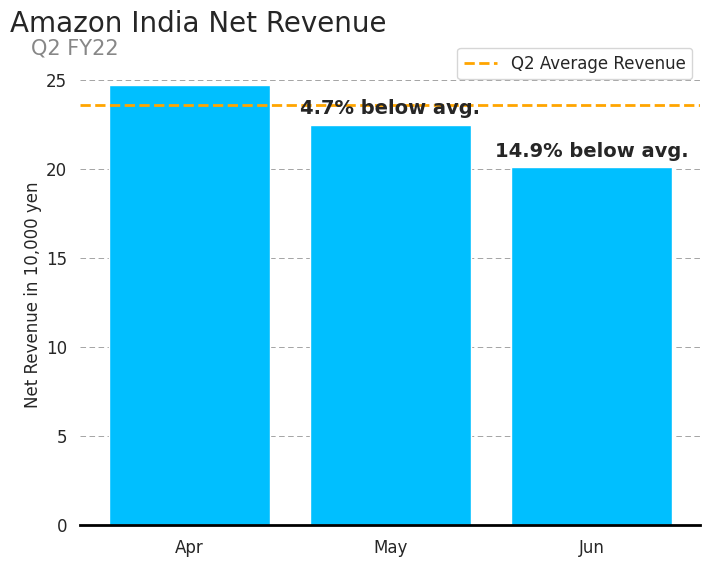

In [116]:
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

# 月ごとの収益合計
monthly_sales = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_(\)': 'sum'})

# 最新の月間収益と四半期平均収益を取得
latest_month_revenue = monthly_sales.tail(1).iloc[0][0]
avg_quarterly_revenue = monthly_sales.tail(3).head(2).mean()[0]

# 四半期の平均収益を下回る割合を計算
pct_below_avg = round((1 - (latest_month_revenue / avg_quarterly_revenue)) * 100, 1)

# 月間売上収益をグラフ化
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['order_amount_(\)'], color='#00bfff')

# A各バーの上に、四半期の平均収益を下回るパーセンテージのラベルを追加
for i, bar in enumerate(bars):
    if i == len(bars) - 1 or i < len(bars) - 2:
        continue
    month_sales = monthly_sales.iloc[i]['order_amount_(\)']
    pct_below_avg = round((1 - (month_sales / avg_quarterly_revenue)) * 100, 1)
    ax.annotate(f'{pct_below_avg}% below avg.',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()-7000),
                xytext=(0, 5), textcoords='offset points',  fontweight='bold',
                ha='center', va='bottom', fontsize=14)

# 四半期の平均収益を下回るパーセンテージを示す最新のバーの上にラベルを追加
latest_bar = bars[-1]
latest_month_sales = latest_bar.get_height()
pct_below_avg = round((1 - (latest_month_sales / avg_quarterly_revenue)) * 100, 1)
ax.annotate(f'{pct_below_avg}% below avg.',
            xy=(latest_bar.get_x() + latest_bar.get_width()/2, latest_bar.get_height()-7000),
            xytext=(0, 5), textcoords='offset points',  fontweight='bold',
            ha='center', va='bottom', fontsize=14)

# 四半期平均収益に水平線を追加
plt.axhline(avg_quarterly_revenue, linestyle='--', color='orange',linewidth=2, label='Q2 Average Revenue')

ax.set_title('Amazon India Net Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_yticklabels(list(range(0,41,5)))
ax.set_ylabel('Net Revenue in 10,000 yen', fontsize=12, labelpad=3)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)

ax.tick_params(axis='both', labelsize=12)
# 上と下の線を除去
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

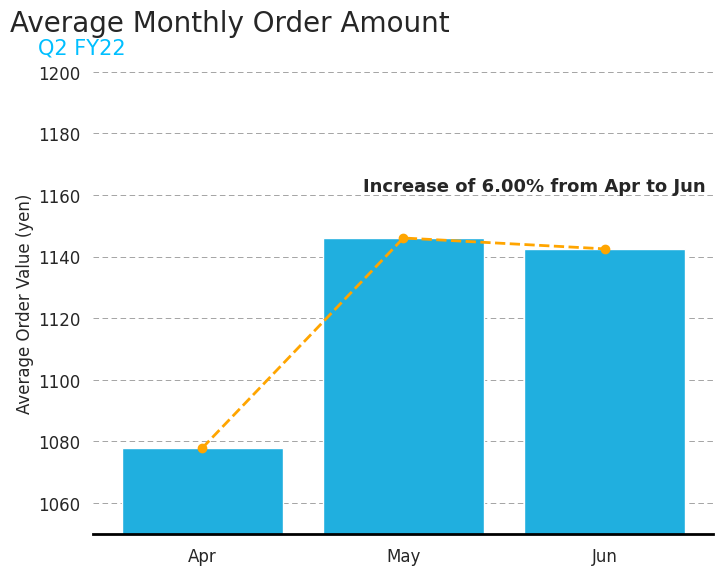

In [134]:
# データを月ごとにグループ化し、平均注文額を計算
monthly_aov = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_(\)': 'sum', 'order_ID': 'nunique'})
monthly_aov['average_order_value'] = monthly_aov['order_amount_(\)'] / monthly_aov['order_ID']

# 前月からの変化率を計算
monthly_aov['pct_change'] = monthly_aov['average_order_value'].pct_change() * 100

# 月ごとの平均注文額の棒グラフを作成
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=monthly_aov.index.strftime('%b'), y=monthly_aov['average_order_value'], ax=ax, color='#00bfff')

# 月あたりの平均注文値のラインプロットを追加
ax.plot(monthly_aov.index.strftime('%b'), monthly_aov['average_order_value'], linestyle='--', linewidth=2, color='orange', marker='o')


# 4月から6月にかけて増加するパーセントのコールアウトを追加
apr_val = monthly_aov['average_order_value'][0]
jun_val = monthly_aov['average_order_value'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100
ax.annotate(f'Increase of {pct_change:.2f}% from Apr to Jun',fontweight='bold', xy=(2,1160), xytext=(1.65, 1160), fontsize=13, ha='center', va='bottom')

# ラベルとタイトル
ax.set_title('Average Monthly Order Amount', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#00bfff', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Average Order Value (yen)', fontsize=12, labelpad=3)
ax.set_ylim(1050, 1200)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)
# 上と下の線を除去
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()

<>:19: DeprecationWarning: invalid escape sequence '\)'
<>:25: DeprecationWarning: invalid escape sequence '\)'
<>:33: DeprecationWarning: invalid escape sequence '\)'
<>:37: DeprecationWarning: invalid escape sequence '\)'
<>:37: DeprecationWarning: invalid escape sequence '\)'
<>:37: DeprecationWarning: invalid escape sequence '\)'
<>:38: DeprecationWarning: invalid escape sequence '\)'
<>:38: DeprecationWarning: invalid escape sequence '\)'
<>:19: DeprecationWarning: invalid escape sequence '\)'
<>:25: DeprecationWarning: invalid escape sequence '\)'
<>:33: DeprecationWarning: invalid escape sequence '\)'
<>:37: DeprecationWarning: invalid escape sequence '\)'
<>:37: DeprecationWarning: invalid escape sequence '\)'
<>:37: DeprecationWarning: invalid escape sequence '\)'
<>:38: DeprecationWarning: invalid escape sequence '\)'
<>:38: DeprecationWarning: invalid escape sequence '\)'
<ipython-input-153-96704137561b>:19: DeprecationWarning: invalid escape sequence '\)'
  sales_by_month =

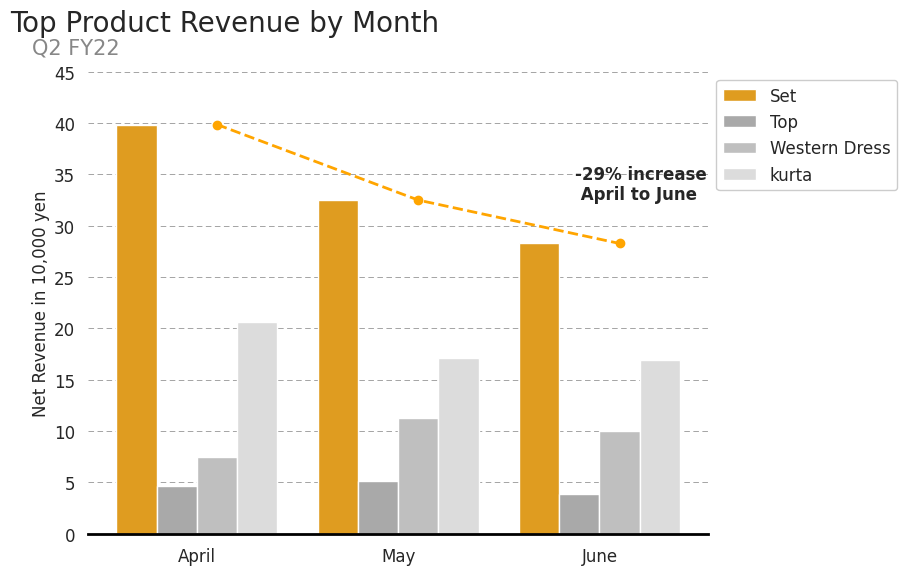

In [153]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(8,6))

# 月の順番
month_order = ['April', 'May', 'June']

# データ指定
sales_data = amazon[amazon['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]

# 日付表示
sales_data['date'] = pd.to_datetime(sales_data['date'])

# 月のみ取り出し
sales_data['month'] = sales_data['date'].dt.month_name()

# 月と製品のカテゴリごとに販売データを集約
sales_by_month = sales_data.groupby(['month', 'product_category'])['order_amount_(\)'].sum().reset_index()

# 月の列を目的の順序でカテゴリデータ型に変換
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

# 売上データのプロット
ax = sns.barplot(x='month', y='order_amount_(\)', hue='product_category', data=sales_by_month,
                 palette=['orange', '#a9a9a9', '#bfbfbf', '#dcdcdc'])

# Setに注目
sales_wd = sales_by_month[sales_by_month['product_category'] == 'Set'].reset_index(drop=True)
sales_wd['month'] = pd.Categorical(sales_wd['month'], categories=month_order, ordered=True)
sales_wd.sort_values(by='month',inplace=True)
# Setに注目したグラフ(推移)
ax.plot([0.1,1.1,2.1], sales_wd['order_amount_(\)'], color='orange', linestyle='--', linewidth=2, marker='o')


# Setの売り上げの推移へのコメント
pct_increase = (sales_wd.loc[1, 'order_amount_(\)'] - sales_wd.loc[0, 'order_amount_(\)']) / sales_wd.loc[0, 'order_amount_(\)'] * 100
ax.annotate(f'{pct_increase:.0f}% increase\n April to June',fontweight='bold', xy=(2.1, sales_wd.loc[2, 'order_amount_(\)']), xytext=(1.88, sales_wd.loc[2, 'order_amount_(\)'] + 40000))


# 必要なyティックの数を設定
num_y_ticks = 10

# yティックの値の計算
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# yティック設定
ax.set_yticks(y_tick_values)


# タイトルとラベル
ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)

plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)

ax.set_xlabel(None)
ax.set_ylabel('Net Revenue in 10,000 yen', fontsize=12, labelpad=3)
ax.set_yticklabels(list(range(0,46,5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')


# グラフ表示
plt.show()
fig.savefig('Avg_MOV.png', dpi=300)
warnings.filterwarnings('default')

<>:2: DeprecationWarning: invalid escape sequence '\)'
<>:39: DeprecationWarning: invalid escape sequence '\)'
<>:2: DeprecationWarning: invalid escape sequence '\)'
<>:39: DeprecationWarning: invalid escape sequence '\)'
<ipython-input-151-e7ea5e98eb91>:2: DeprecationWarning: invalid escape sequence '\)'
  sales_by_category = amazon.groupby('product_category')['order_amount_(\)'].sum()
<ipython-input-151-e7ea5e98eb91>:39: DeprecationWarning: invalid escape sequence '\)'
  avg_cost = amazon[amazon['product_category'] == category]['order_amount_(\)'].mean()
<ipython-input-151-e7ea5e98eb91>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)


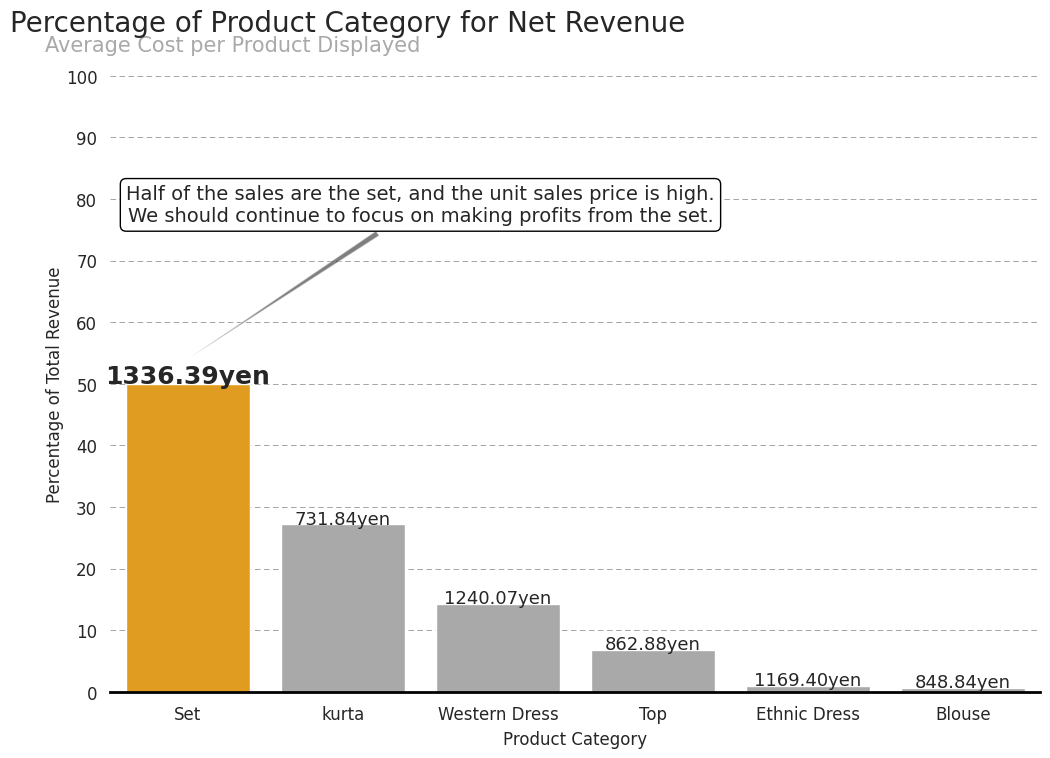

In [151]:
# 製品カテゴリごとにデータをグループ化し、総売上を計算
sales_by_category = amazon.groupby('product_category')['order_amount_(\)'].sum()

# フィルタリング
included_categories = ['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse']
sales_by_category = sales_by_category.loc[included_categories]

# 総売り上げの計算
total_revenue = sales_by_category.sum()

# カテゴリ別の売り上げ割合
sales_by_category_pct = (sales_by_category / total_revenue) * 100

# 売上ごとのソート
sales_by_category_pct = sales_by_category_pct.sort_values(ascending=False)

# Setをハイライト
fig, ax = plt.subplots(figsize=(12,8))
palette_colors = ['orange' if cat in ['Set'] else '#a9a9a9' for cat in sales_by_category_pct.index]
sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)

# yティック設定
num_y_ticks = 10
y_tick_values = list(range(0,101,10))#np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)
ax.set_yticks(y_tick_values)

ax.set_ylabel('Percentage of Total Revenue', labelpad=1)
ax.set_ylim(0, 100)
ax.set_xlabel('Product Category', labelpad=5)
ax.set_title('Percentage of Product Category for Net Revenue', fontsize=20, x=0.255, y=1.05, pad=10)
ax.text(-.07, 1.04, 'Average Cost per Product Displayed', fontsize=15, color='#a9a9a9', transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=12)
#ax.set_yticklabels(list(range(0,101,10)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

# 系列名表示ハイライト
for i, category in enumerate(sales_by_category_pct.index):
    avg_cost = amazon[amazon['product_category'] == category]['order_amount_(\)'].mean()
    if category in 'Set':
        ax.text(i, sales_by_category_pct.values[i] +.1, f'{avg_cost:.2f}yen', ha='center', fontsize=18, fontweight='bold')
    else:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'{avg_cost:.2f}yen', ha='center', fontsize=13)


# Setについてのパラメータ
set_sales = sales_by_category_pct['Set']
set_index = sales_by_category_pct.index.get_loc('Set')

# テキストボックス設定
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=1)
arrow_props = dict(facecolor='black', arrowstyle='wedge', alpha=0.5)

# テキストボックス配置
x_pos = set_index
y_pos = set_sales + 2
x_text = x_pos + 0.5
y_text = y_pos - 8

# Setの売り上げ割合
western_pct = (set_sales / total_revenue) * 100

# コメント内容
ax.annotate('Half of the sales are the set, and the unit sales price is high.\nWe should continue to focus on making profits from the set.', xy=(x_pos, y_pos+2), xytext=(x_text+1, y_text+35), fontsize=14,
arrowprops=arrow_props, bbox=bbox_props, ha='center', va='center')


# グラフ体裁
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()
fig.savefig('Percent_Prod_Revenuw.png', dpi=300)

<>:2: DeprecationWarning: invalid escape sequence '\)'
<>:2: DeprecationWarning: invalid escape sequence '\)'
<ipython-input-152-c4f3704baadb>:2: DeprecationWarning: invalid escape sequence '\)'
  sales_by_size = amazon.groupby('size')['order_amount_(\)'].sum()
<ipython-input-152-c4f3704baadb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = amazon.groupby('size')['order_amount_(\)'].sum()
<ipython-input-152-c4f3704baadb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)
<ipython-input-152-c4f3704baadb>:15: UserWarning: set_ticklabels() should only be used w

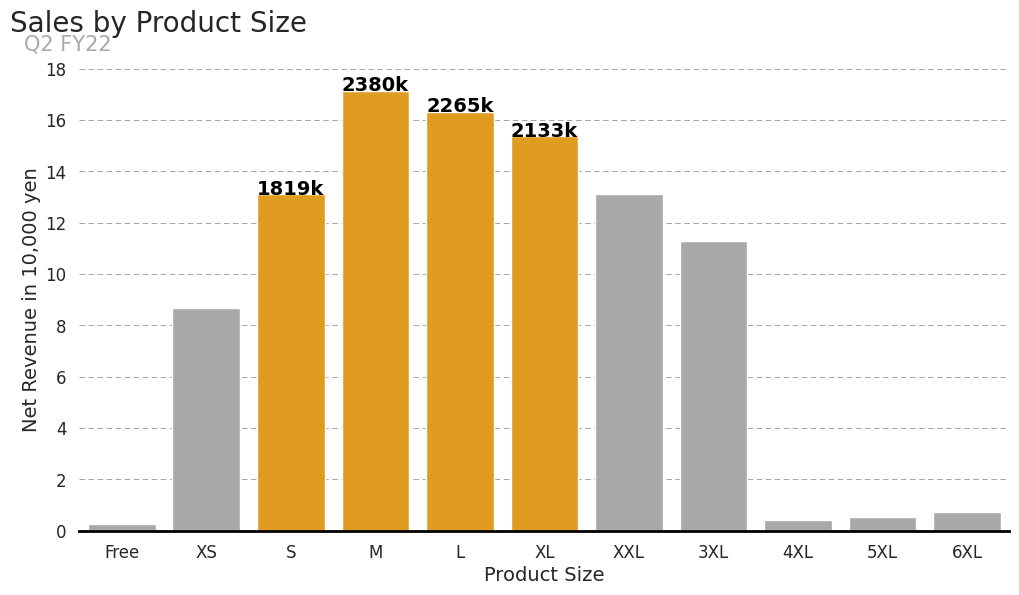

In [152]:
# 製品サイズごとにデータをグループ化し、総売上を計
sales_by_size = amazon.groupby('size')['order_amount_(\)'].sum()

# 製品サイズごとに販売を示す水平バーチャートを作成
fig, ax = plt.subplots(figsize=(12,6))

# Use a color palette to highlight specific sizes
palette_colors = ['orange' if size in ['S', 'M', 'L', 'XL'] else '#a9a9a9' for size in sales_by_size.index]
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)


#軸とティック
ax.set_xlabel('Product Size', labelpad=3, fontsize=14)
ax.set_ylabel('Net Revenue in 10,000 yen', labelpad=3, fontsize=14)
ax.set_yticklabels(list(range(0,20,2)))
ax.set_title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
ax.text(-0.06, 1.04, 'Q2 FY22', fontsize=15, color='#a9a9a9', transform=ax.transAxes)
#ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)


ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


# yティック
num_y_ticks = 10
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)
ax.set_yticks(y_tick_values)

# アノテーション
for i, size in enumerate(sales_by_size.index):
    if size in ['S', 'M', 'L', 'XL']:
        ax.text(i, sales_by_size.values[i], f'{sales_by_size.values[i]/10000:.0f}k', ha='center', fontsize=14, fontweight='bold', color='black')


# グラフ体裁
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('Sales_Prod_Size.png', dpi=300)

<>:5: DeprecationWarning: invalid escape sequence '\)'
<>:18: DeprecationWarning: invalid escape sequence '\)'
<>:23: DeprecationWarning: invalid escape sequence '\)'
<>:31: DeprecationWarning: invalid escape sequence '\)'
<>:40: DeprecationWarning: invalid escape sequence '\)'
<>:49: DeprecationWarning: invalid escape sequence '\)'
<>:58: DeprecationWarning: invalid escape sequence '\)'
<>:5: DeprecationWarning: invalid escape sequence '\)'
<>:18: DeprecationWarning: invalid escape sequence '\)'
<>:23: DeprecationWarning: invalid escape sequence '\)'
<>:31: DeprecationWarning: invalid escape sequence '\)'
<>:40: DeprecationWarning: invalid escape sequence '\)'
<>:49: DeprecationWarning: invalid escape sequence '\)'
<>:58: DeprecationWarning: invalid escape sequence '\)'
<ipython-input-156-87c5421b140e>:5: DeprecationWarning: invalid escape sequence '\)'
  sales_by_state = amazon.groupby('state')['order_amount_(\)'].sum()
<ipython-input-156-87c5421b140e>:18: DeprecationWarning: invalid

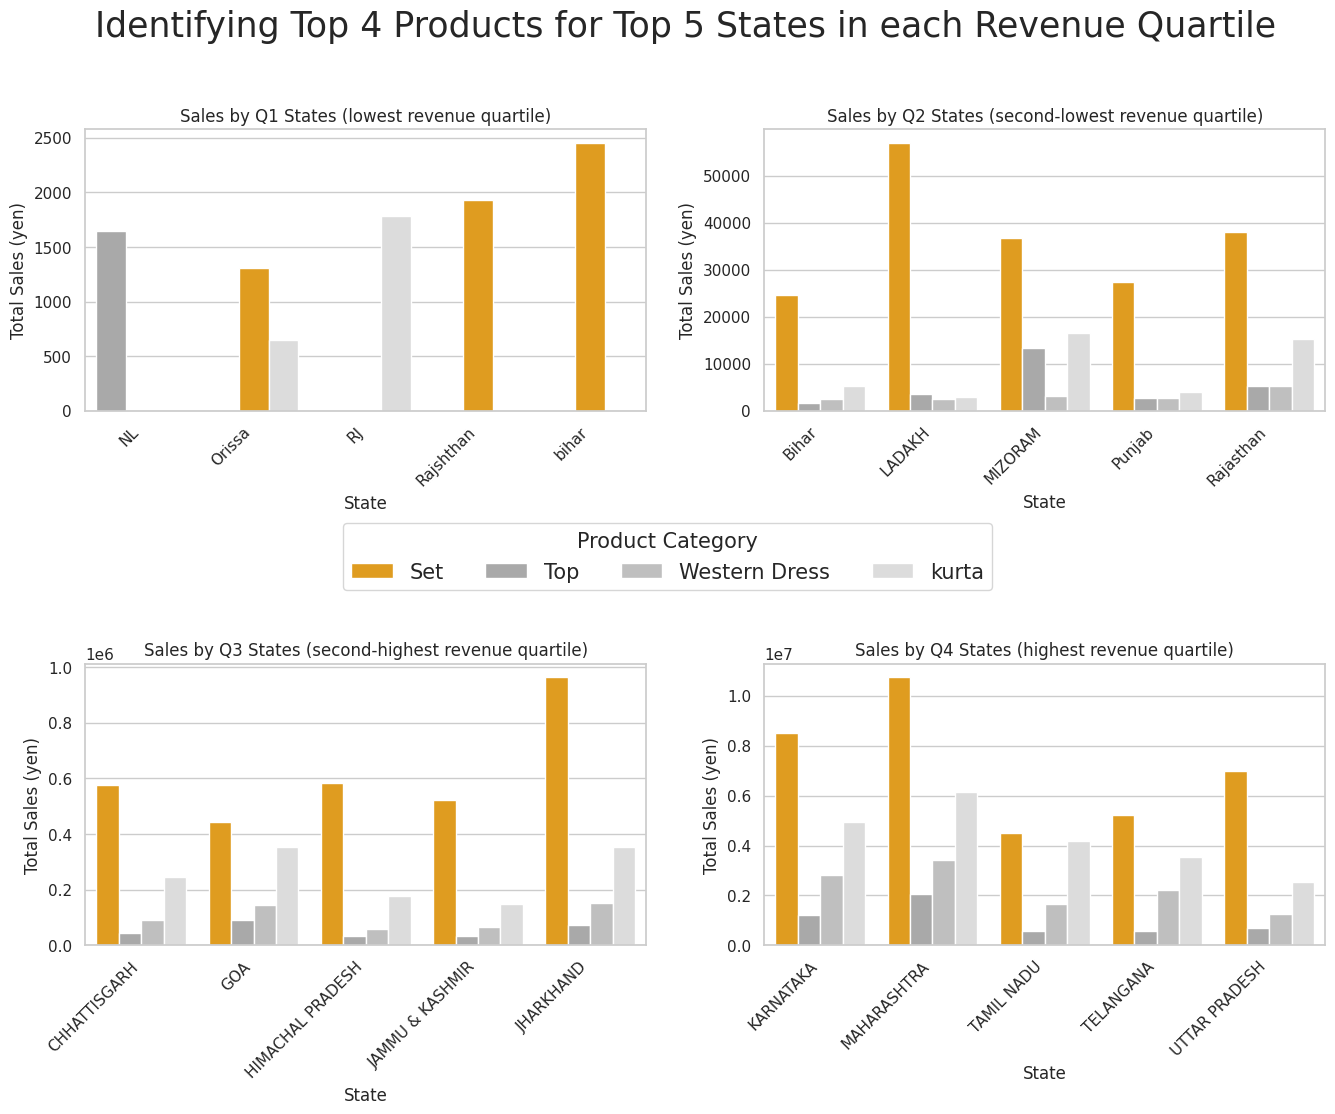

In [156]:
# 系列色指定
colors = {'Top': '#a9a9a9', 'Set': 'orange', 'kurta': '#dcdcdc', 'Western Dress': '#bfbfbf'}

# 州ごとの総売り上げ
sales_by_state = amazon.groupby('state')['order_amount_(\)'].sum()

# 上下5番目までピックアップ
n_states = len(sales_by_state)
quartiles = pd.qcut(sales_by_state, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
top_states = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_states += sales_by_state[quartiles == q].nlargest(5).index.tolist()

# フィルタリング
top_sales = amazon[amazon['state'].isin(top_states)]

# 州と製品別の売り上げ
sales_by_state_product = top_sales.groupby(['state', 'product_category'])['order_amount_(\)'].sum().reset_index()

# クウォーターごとのトップ3
top_products = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount_(\)'))['product_category'].tolist()

# サブプロットの軸
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharey=False)

# Q1
q1_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q1'].index)]
q1_sales = q1_sales[q1_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_(\)', hue='product_category', data=q1_sales, ax=axs[0, 0], palette=colors)
axs[0, 0].legend().set_visible(False)
axs[0, 0].set_title('Sales by Q1 States (lowest revenue quartile)')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Total Sales (yen)')

# Q2
q2_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q2'].index)]
q2_sales = q2_sales[q2_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_(\)', hue='product_category', data=q2_sales, palette=colors, ax=axs[0, 1])
axs[0, 1].legend().set_visible(False)
axs[0, 1].set_title('Sales by Q2 States (second-lowest revenue quartile)')
axs[0, 1].set_xlabel('State')
axs[0, 1].set_ylabel('Total Sales (yen)')

# Q2
q3_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q3'].index)]
q3_sales = q3_sales[q3_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_(\)', hue='product_category', data=q3_sales, palette=colors, ax=axs[1, 0])
axs[1, 0].legend().set_visible(False)
axs[1, 0].set_title('Sales by Q3 States (second-highest revenue quartile)')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Total Sales (yen)')

# Q3
q4_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q4'].index)]
q4_sales = q4_sales[q4_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_(\)', hue='product_category', data=q4_sales, palette=colors, ax=axs[1, 1])
axs[1, 1].legend().set_visible(False)
axs[1, 1].set_title('Sales by Q4 States (highest revenue quartile)')
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Total Sales (yen)')

# 位置調整
plt.subplots_adjust(hspace=.9, wspace=.21, bottom=.2)

# xラベル回転
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# リガンド追加
handles, labels = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=len(labels), title='Product Category', fontsize=15, title_fontsize = 15)


plt.suptitle("Identifying Top 4 Products for Top 5 States in each Revenue Quartile", fontsize = 25)
# グラフ表示
plt.show()
fig.savefig('Top_Products_Top_States.png', dpi=300)